In [1]:
import pandas as pd 
from dotenv import load_dotenv, find_dotenv
import swifter

from tqdm import tqdm
import os
from pathlib import Path
load_dotenv()
DOTENV_PATH = find_dotenv()

import BreakageClassifier.code.forums.utils as forum_utils
import BreakageClassifier.code.forums.filterlists as forum_filterlists
from net_rep import Crawler
import sqlite3 as sql

/home/saiid/miniconda3/envs/openwpm/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
issues_df = pd.read_csv('../forums-out/easylist/easylist-data.csv')
reproduce_df = pd.read_csv('../forums-out/easylist/manual-reproduce.csv')
reproduce_df = reproduce_df.dropna()
investigated_issues = reproduce_df.dropna().id.unique().astype(int).tolist()

issues_df = issues_df[issues_df.id.isin(investigated_issues)]
print(f"investigated_issues: {len(investigated_issues)}")
print(f"Reproducible issues: {len(reproduce_df[reproduce_df.reproduce == True])}")
print(f"Unreproducible issues: {len(reproduce_df[reproduce_df.reproduce == False])}")

issues_fp = Path("../net_rep-out/easylist/easylist-data-rep.csv")


investigated_issues: 170
Reproducible issues: 75
Unreproducible issues: 95


In [3]:
issues_df = issues_df[issues_df.repo == "easylist/easylist"]


In [4]:
issue = issues_df.iloc[0]
after_commit = issue.after_commit
after_commit_par = forum_utils.get_commit_parent("easylist/easylist", after_commit)
before_commit = issue.before_commit

In [7]:
issues_df.to_csv(issues_fp, index=False)

In [ ]:
issue_commits = []

for _, issue in tqdm(issues_df.iterrows(), total=len(issues_df)):
    after_commit = issue.after_commit
    after_commit_date = forum_utils.get_commit_date("easylist/easylist", after_commit)
    after_commit_par = forum_utils.get_commit_parent("easylist/easylist", after_commit)
    after_commit_par_date = forum_utils.get_commit_date("easylist/easylist", after_commit_par)
    before_commit = issue.before_commit
    before_commit_date = forum_utils.get_commit_date("easylist/easylist", before_commit)
    
    issue_commits.append({
        "id": issue.id,
        "before_commit": before_commit,
        "before_commit_date": before_commit_date,
        "after_commit_par": after_commit_par,
        "after_commit_par_date": after_commit_par_date,
        "after_commit": after_commit,
        "after_commit_date": after_commit_date,
    })
    
issue_commits_df = pd.DataFrame(issue_commits)
        

In [ ]:
os.makedirs("../net_rep-out/easylist", exist_ok=True)
issue_commits_df.to_csv("../net_rep-out/easylist/issue-commits.csv", index=False)

In [4]:
issue_commits_df = pd.read_csv("../net_rep-out/easylist/issue-commits.csv")

In [13]:
forum_filterlists.get_filterlist_from_post(
    {
        "easylist": {
            "repo": "easylist/easylist",
            "dirs": ["/easylist/"]
        }
    }, 
    Path("../net_rep-out/easylist/filterlists") / str(issue.id) / "before.txt",
    
    commit_dict={
        "easylist": {
            "sha": issue.before_commit,
            "date": None
        }
    }
)

[1492660]

In [4]:
crawler = Crawler(
    data_dir=Path("../net_rep-out/easylist/crawl"),
)

# Crawl with no filterlists
crawler.crawl_from_dataset(
    issues_path=issues_fp,
    filterlists_path=Path("../net_rep-out/easylist/filterlists"),
    num=2,
)

browser_manager      - INFO     - BROWSER 2059658170: Launching browser...
task_manager         - INFO     - 

OpenWPM Version: b'524fa73'
Firefox Version: b'100.0'

========== Manager Configuration ==========
{
  "_failure_limit": null,
  "data_directory": "/home/saiid/summer22-SaiidHajj/Experiments/net_rep-out/easylist/crawl",
  "log_path": "/home/saiid/summer22-SaiidHajj/Experiments/net_rep-out/easylist/crawl/openwpm.log",
  "logger_address": [
    "127.0.0.1",
    38071
  ],
  "memory_watchdog": false,
  "num_browsers": 1,
  "process_watchdog": false,
  "screenshot_path": "/home/saiid/summer22-SaiidHajj/Experiments/net_rep-out/easylist/crawl/screenshots",
  "source_dump_path": "/home/saiid/summer22-SaiidHajj/Experiments/net_rep-out/easylist/crawl/sources",
  "storage_controller_address": [
    "127.0.0.1",
    42021
  ],
  "testing": false
}

========== Browser Configuration ==========
Keys:
{
  "browser_id": 0,
  "bot_mitigation": 1,
  "browser": 2,
  "callstack_instrument": 3,
  

  0%|          | 0/2 [00:00<?, ?it/s]

browser_manager      - INFO     - BROWSER 2059658170: EXECUTING COMMAND: InitializeCommand()
browser_manager      - INFO     - BROWSER 2059658170: EXECUTING COMMAND: AddonSetupCommand
addon                - INFO     - UBlock installed @ moz-extension://e144de8d-dfae-4830-9716-1ad6a950058f
addon                - INFO     - Ublock should be installed. (check=False)
browser_manager      - INFO     - BROWSER 2059658170: EXECUTING COMMAND: FinalizeCommand(5)
browser_manager      - INFO     - Finished working on CommandSequence with visit_id 3095693365815667 on browser with id 2059658170
storage_controller   - INFO     - Awaiting all tasks for visit_id 3095693365815667
browser_manager      - INFO     - Starting to work on CommandSequence with visit_id 8550647438703311 on browser with id 2059658170
browser_manager      - INFO     - BROWSER 2059658170: EXECUTING COMMAND: InitializeCommand()
browser_manager      - INFO     - BROWSER 2059658170: EXECUTING COMMAND: ClearCookiesCommand
cookies    

100%|██████████| 2/2 [00:38<00:00, 19.09s/it]

browser_manager      - INFO     - Starting to work on CommandSequence with visit_id 6937002739254767 on browser with id 2059658170
browser_manager      - INFO     - BROWSER 2059658170: EXECUTING COMMAND: InitializeCommand()
browser_manager      - INFO     - BROWSER 2059658170: EXECUTING COMMAND: ClearCookiesCommand
cookies              - INFO     - Cleared cookies
browser_manager      - INFO     - BROWSER 2059658170: EXECUTING COMMAND: FilterListLoadCommand
addon                - INFO     - Filterlist should be loaded (check=False)
browser_manager      - INFO     - BROWSER 2059658170: EXECUTING COMMAND: GetCommand(https://www.overclockers.co.uk/,3)
browser_manager      - INFO     - BROWSER 2059658170: EXECUTING COMMAND: FinalizeCommand(5)
browser_manager      - INFO     - Finished working on CommandSequence with visit_id 6937002739254767 on browser with id 2059658170
storage_controller   - INFO     - Awaiting all tasks for visit_id 6937002739254767
net_rep              - INFO     - iss

100%|██████████| 2/2 [01:07<00:00, 33.73s/it]


storage_controller   - INFO     - Terminating handler, because the underlying socket closed
storage_controller   - INFO     - Terminating handler, because the underlying socket closed
storage_controller   - INFO     - Received shutdown signal!
storage_controller   - INFO     - Awaiting all tasks for visit_id 8550647438703311
sql_provider         - WARNING  - Visit with visit_id 8550647438703311 got interrupted
storage_controller   - INFO     - Awaiting all tasks for visit_id 6937002739254767
sql_provider         - WARNING  - Visit with visit_id 6937002739254767 got interrupted


Executing <Task pending name='Task-4' coro=<StorageController._run() running at /home/saiid/OpenWPM/openwpm/storage/storage_controller.py:353> wait_for=<Task pending name='CompletionQueueFeeder' coro=<StorageController.update_completion_queue() running at /home/saiid/OpenWPM/openwpm/storage/storage_controller.py:323> wait_for=<Future pending cb=[Task.task_wakeup()] created at /home/saiid/miniconda3/envs/openwpm/lib/python3.10/asyncio/base_events.py:429> cb=[Task.task_wakeup()] created at /home/saiid/miniconda3/envs/openwpm/lib/python3.10/asyncio/tasks.py:337> cb=[_run_until_complete_cb() at /home/saiid/miniconda3/envs/openwpm/lib/python3.10/asyncio/base_events.py:184] created at /home/saiid/miniconda3/envs/openwpm/lib/python3.10/asyncio/tasks.py:636> took 0.125 seconds


Shutdown took 7.936984539031982 seconds


In [5]:
from BreakageClassifier.code.graph.utils import get_domain

def get_requests(crawl_dir: Path):
    conn = sql.connect(str(crawl_dir / "crawl-data.sqlite"))
    c = conn.cursor()
    
    experiments_df = pd.read_csv(crawl_dir / "experiments.csv")
    
    # print the names of the sql columns for site_visits
    c.execute("SELECT visit_id, site_rank, site_url FROM site_visits;")
   
    visits_df = pd.DataFrame(c.fetchall(), columns=["visit_id", "site_rank", "site_url"])
    
    c.execute("SELECT visit_id, url, top_level_url, resource_type FROM http_requests;")
    requests = c.fetchall()
    conn.close()
    
    # convert to dataframe
    requests_df = pd.DataFrame(requests, columns=["visit_id", "url", "top_level_url", "resource_type"])
    
    # merge with visits
    requests_df = requests_df.merge(visits_df, on="visit_id")
    requests_df.drop("visit_id", axis=1, inplace=True)
    
    # drop rows where url == site_url or url/ == site_url
    requests_df = requests_df[requests_df.apply(
        lambda x: (x.url != x.site_url) and (x.url.rstrip("/") != x.site_url), axis=1
    )]
    
    requests_df = requests_df.merge(experiments_df, on="site_rank")
    
    # drop duplicates
    requests_df.drop_duplicates(inplace=True)
    
    # get top_level_domain
    requests_df["top_level_domain"] = requests_df.url.apply(get_domain)
    requests_df['current_domain'] = requests_df.site_url.apply(get_domain)
    
    requests_df = requests_df.groupby("id")
    
    return requests_df



In [6]:
requests = get_requests(Path("../net_rep-out/easylist/crawl/datadir"))

In [7]:
df_blocks = pd.read_csv("../net_rep-out/easylist/results/request-blocks.csv")



In [61]:
def block_counts(request_group: pd.DataFrame):
    
    # we need to count the differences between `blocked_before` and `blocked_after`
    
    request_group['blocked_before'] = request_group.blocked_before.apply(lambda x: True if x == 'True' else False)
    
    # get the number of requests blocked before
    blocked_before = request_group.blocked_before.sum()
    
    # get the number of requests blocked after
    blocked_after = request_group.blocked_after.sum()
    
    # get the number of requests blocked before and after
    blocked_before_after = request_group[(request_group.blocked_before == True) & (request_group.blocked_after == True)].shape[0]
    
    # get the number of requests blocked before but not after
    blocked_before_not_after = request_group[(request_group.blocked_before == True) & (request_group.blocked_after == False)].shape[0]
    
    # get the number of requests blocked after but not before
    blocked_after_not_before = request_group[(request_group.blocked_before == False) & (request_group.blocked_after == True)].shape[0]
    
    # get the number of requests not blocked before or after
    not_blocked_before_after = request_group[(request_group.blocked_before == False) & (request_group.blocked_after == False)].shape[0]
    
    return pd.Series({
        "blocked_before": blocked_before,
        "blocked_after": blocked_after,
        "blocked_before_after": blocked_before_after,
        "blocked_before_not_after": blocked_before_not_after,
        "blocked_after_not_before": blocked_after_not_before,
        "not_blocked_before_after": not_blocked_before_after
    })
    
def is_breaking_heu(_block_counts: pd.Series):
    
    if _block_counts.blocked_before_after == _block_counts.blocked_after:
        return False
    
    return True


def is_breaking_heu_prob(_block_counts: pd.Series):
    delta_break = abs(_block_counts.blocked_before_after - _block_counts.blocked_before)
    total_break = _block_counts.blocked_before_after + _block_counts.blocked_before
    
    ratio = delta_break / total_break if total_break != 0 else 0
    return ratio

def is_breaking_heu_thresh(_block_counts: pd.Series, thresh=0.5):
    
    ratio = is_breaking_heu_prob(_block_counts)
    
    if ratio > thresh:
        return True
    
    return False

In [62]:
predictions_df = df_blocks.groupby("id").apply(block_counts).reset_index()
predictions_df['id'] = predictions_df.id.astype(str)
predictions_df['rep_pred'] = predictions_df.apply(is_breaking_heu_prob, axis=1)
compare_df = reproduce_df.merge(predictions_df, on="id")

# compare_df.to_csv("../net_rep-out/easylist/results/rep-predictions.csv", index=False)
compare_df

,id,reproduce,blocked_before,blocked_after,blocked_before_after,blocked_before_not_after,blocked_after_not_before,not_blocked_before_after,rep_pred
0,47396,True,4,4,4,0,0,73,0.0
1,47391,False,0,0,0,0,0,12,0.0
2,47386,True,0,1,0,0,1,59,0.0
3,47382,True,2,2,2,0,0,97,0.0
4,47373,False,64,64,64,0,0,222,0.0
...,...,...,...,...,...,...,...,...,...
140,46044,False,1,2,1,0,1,4,0.0
141,46042,False,0,0,0,0,0,1,0.0
142,46028,False,0,0,0,0,0,15,0.0
143,46025,False,0,0,0,0,0,28,0.0


In [69]:
y_true = compare_df.reproduce.astype(int).tolist()
y_pred = compare_df.rep_pred.astype(int).tolist()

from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

print(f"Falsely predicted as breaking: {compare_df[(compare_df.reproduce == True) & (compare_df.rep_pred == False)].shape[0]}/{compare_df[compare_df.reproduce == True].shape[0]}")
print(f"Falsely predicted as not breaking: {compare_df[(compare_df.reproduce == False) & (compare_df.rep_pred == True)].shape[0]}/{compare_df[compare_df.reproduce == False].shape[0]}")

              precision    recall  f1-score   support

           0       0.57      0.97      0.72        79
           1       0.78      0.11      0.19        66

    accuracy                           0.58       145
   macro avg       0.67      0.54      0.45       145
weighted avg       0.66      0.58      0.48       145

Falsely predicted as breaking: 55/66
Falsely predicted as not breaking: 2/79


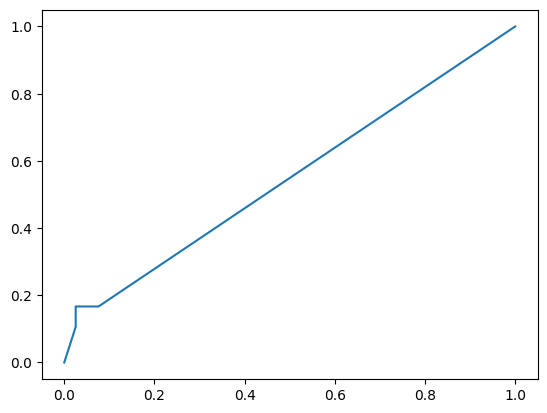

In [68]:
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_true, compare_df.rep_pred.tolist())

import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.show()
